In [1]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
import datetime
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
main_path = "/content/gdrive/My Drive/Remote LSTM"
datasets = ["LostCreek_MI_DailyData", "NE3_DailyData", "TonziRanch_CA_DailyData", "WalnutGulchWatershed_AZ_DailyData"]

In [5]:
select = 0

file_path = datasets[select]

In [6]:
df = pd.read_excel(f"{main_path}/Data Daily/{file_path}.xlsx")
df = df.set_index("Date")

In [7]:
if select == 0:
    raw = df["2001":]
elif select == 1:
    raw = df["2002":]
elif select == 2:
    raw = df["2002":]
elif select == 3:
    raw = df["2010":]
else:
    raise Exception("error")

In [8]:
raw

,LE (W/m2)
Date,
2001-01-01,1.581051
2001-01-02,1.912062
2001-01-03,1.255698
2001-01-04,1.585694
2001-01-05,2.446013
...,...
2019-12-24,3.058299
2019-12-25,5.357877
2019-12-26,17.474479


In [9]:
pred = pd.read_excel(f"{main_path}/linear results raw/predictions_raw_365_{file_path}.xlsx")
del pred["Unnamed: 0"]
pred['Date'] = raw.index
pred = pred.set_index("Date")

In [10]:
def rescale(x, mode="minmax", a=None, b=None):
    return a + ((x - 0) * (b - a)) / (1 - 0)

In [11]:
mini = df['LE (W/m2)'].min()
maxo = df['LE (W/m2)'].max()
print(mini, maxo)
pred = rescale(pred, "custom", mini, maxo)

0.007287 269.7800488


In [12]:
pred = pd.concat((raw, pred), axis=1)

In [13]:
if select in (0, 2, 3):
    top = "2020-01-01"
else:
    top = "2015-01-01"

In [14]:
datelist = pd.date_range(start=top, periods=len(pred.columns) - 2).tolist()
for day in datelist:
    pred = pred.append(pd.Series(name=day, dtype="float64"))

In [15]:
for idx, col in enumerate(pred.columns):
    if idx == 0:
        continue
    pred[col] = pred[col].shift(idx - 1)

In [16]:
pred

,LE (W/m2),1 day forecast,2 day forecast,3 day forecast,4 day forecast,5 day forecast,6 day forecast,7 day forecast,8 day forecast,9 day forecast,10 day forecast,11 day forecast,12 day forecast,13 day forecast,14 day forecast,15 day forecast,16 day forecast,17 day forecast,18 day forecast,19 day forecast,20 day forecast,21 day forecast,22 day forecast,23 day forecast,24 day forecast,25 day forecast,26 day forecast,27 day forecast,28 day forecast,29 day forecast,30 day forecast,31 day forecast,32 day forecast,33 day forecast,34 day forecast,35 day forecast,36 day forecast,37 day forecast,38 day forecast,39 day forecast,...,326 day forecast,327 day forecast,328 day forecast,329 day forecast,330 day forecast,331 day forecast,332 day forecast,333 day forecast,334 day forecast,335 day forecast,336 day forecast,337 day forecast,338 day forecast,339 day forecast,340 day forecast,341 day forecast,342 day forecast,343 day forecast,344 day forecast,345 day forecast,346 day forecast,347 day forecast,348 day forecast,349 day forecast,350 day forecast,351 day forecast,352 day forecast,353 day forecast,354 day forecast,355 day forecast,356 day forecast,357 day forecast,358 day forecast,359 day forecast,360 day forecast,361 day forecast,362 day forecast,363 day forecast,364 day forecast,365 day forecast
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1.581051,3.198414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-02,1.912062,2.577528,3.044153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,1.255698,3.052760,3.244780,3.564231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,1.585694,3.710159,4.275200,4.385567,4.650259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,2.446013,2.610688,3.130156,3.320982,3.392641,3.752686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.314755,13.211635,7.103375,6.524265,6.973709
2020-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [17]:
pred.to_excel(f"{main_path}/linear results/results_{file_path}.xlsx")

# GRAPHS

In [18]:
matplotlib.rcParams["figure.figsize"] = (20, 10)

## All train years + test year

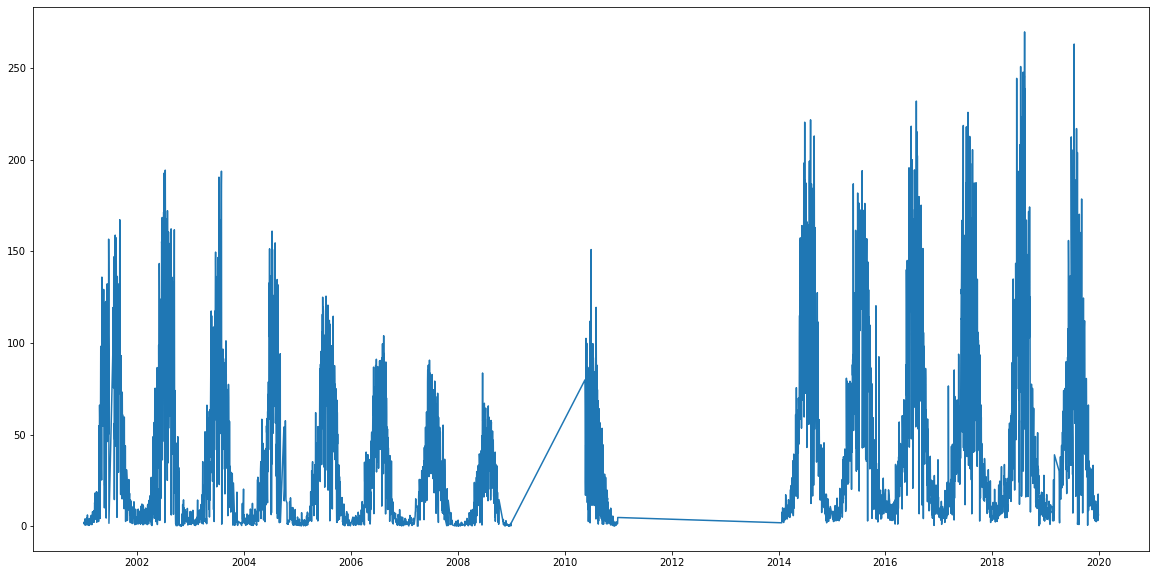

In [19]:
plt.plot(pred["LE (W/m2)"])

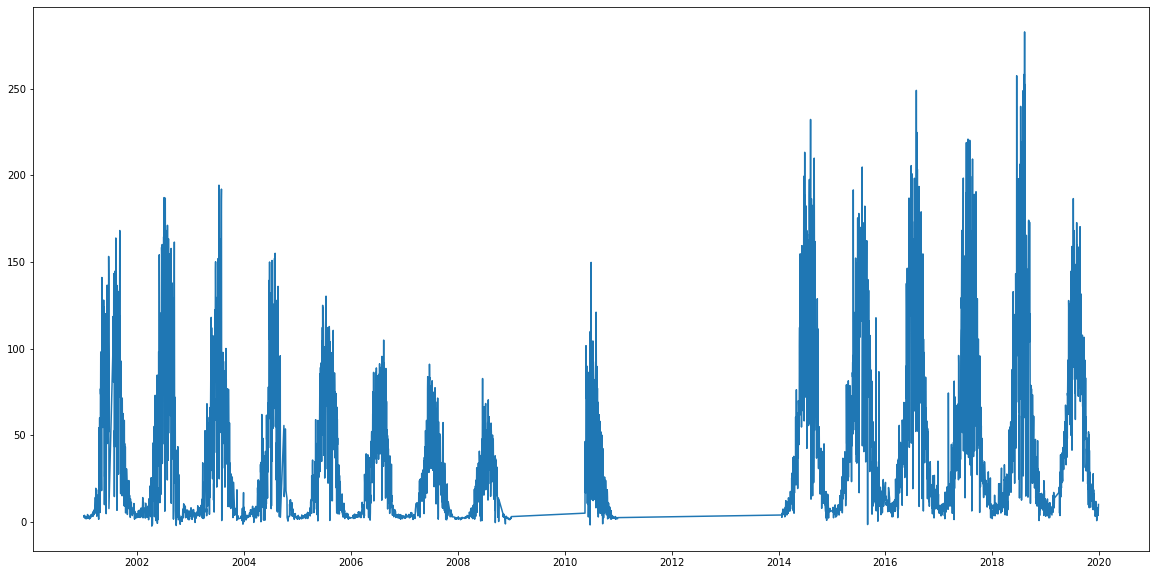

In [20]:
plt.plot(pred["1 day forecast"])

## Final train year + test year

In [21]:
if select in (0, 2, 3):
    two_yrs = pred["2018":]
else:
    two_yrs = pred["2013":]

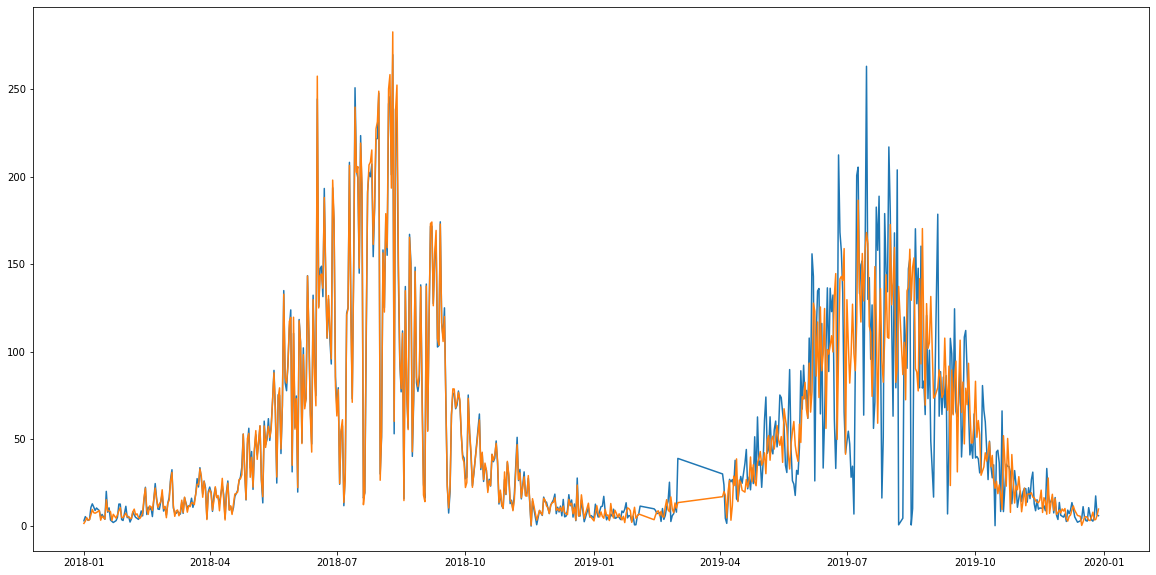

In [22]:
plt.plot(two_yrs["LE (W/m2)"])
plt.plot(two_yrs["1 day forecast"])

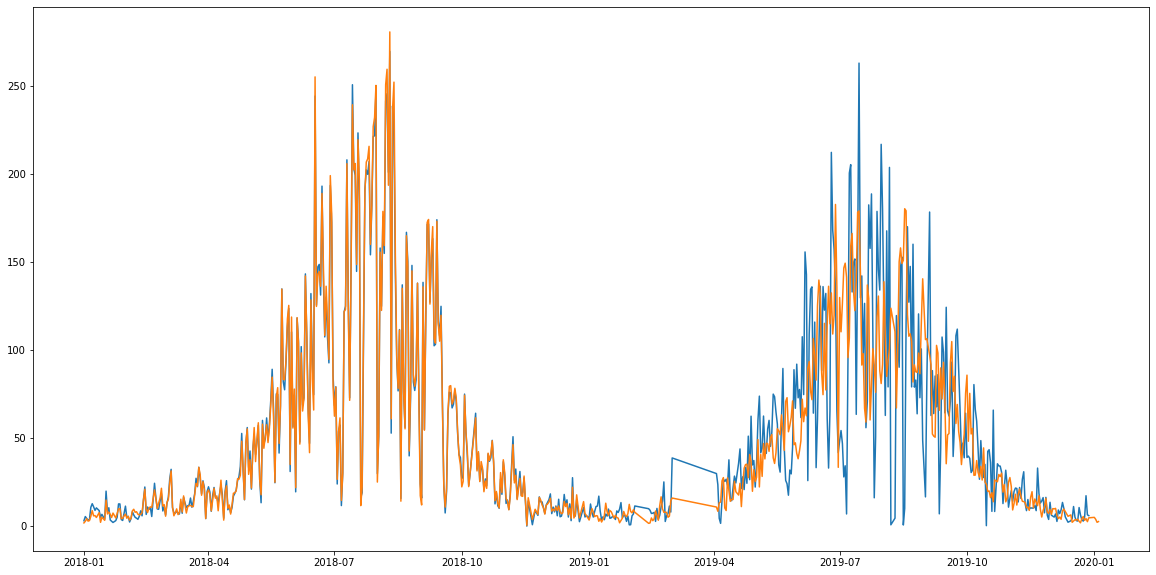

In [23]:
plt.plot(two_yrs["LE (W/m2)"])
plt.plot(two_yrs["5 day forecast"])

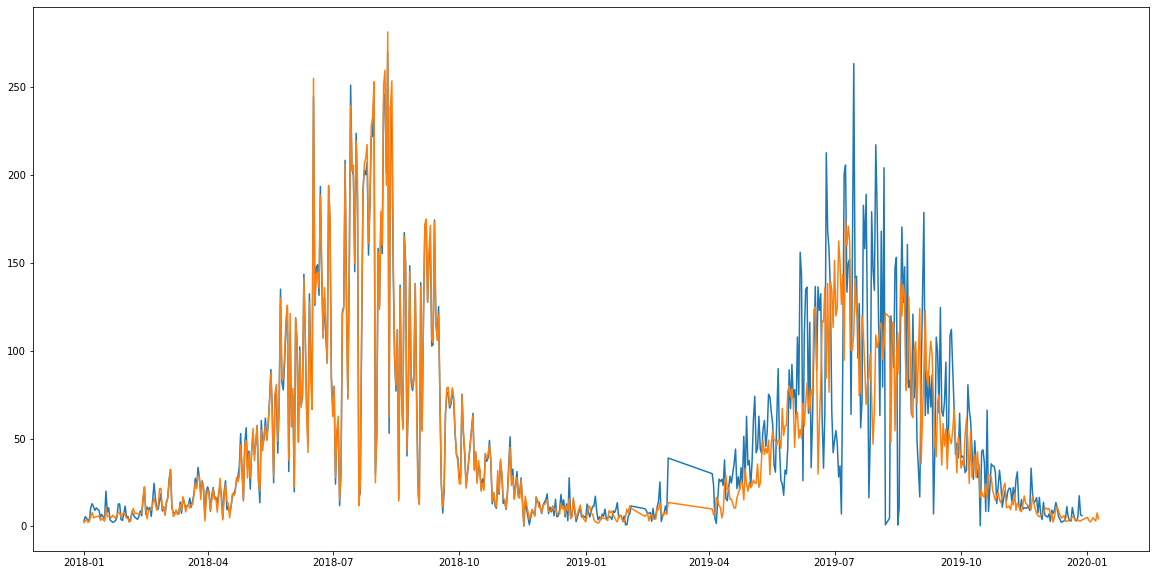

In [24]:
plt.plot(two_yrs["LE (W/m2)"])
plt.plot(two_yrs["10 day forecast"])

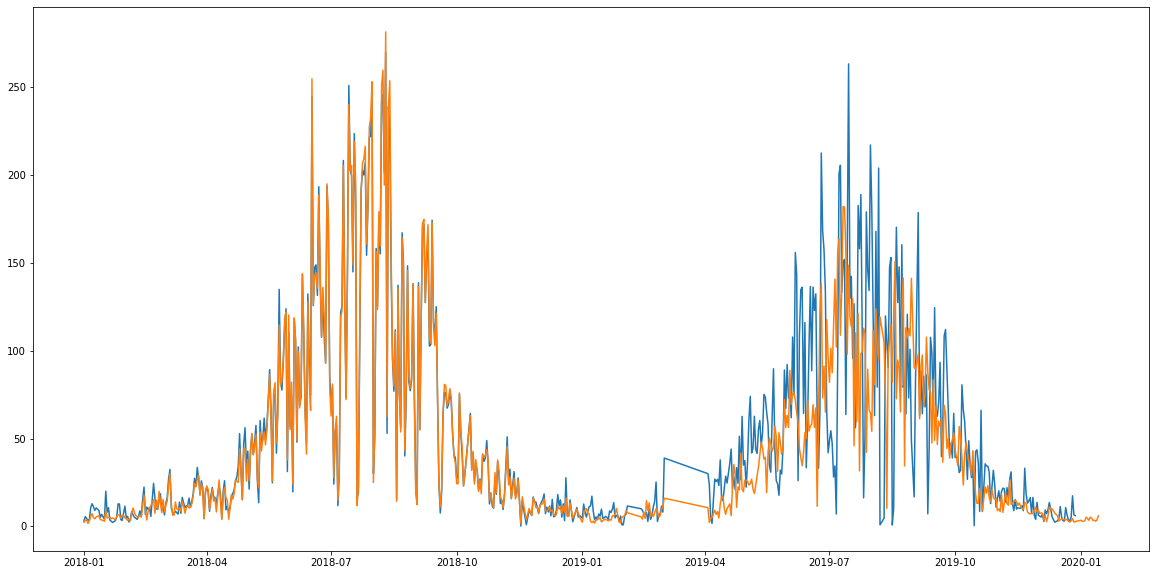

In [25]:
plt.plot(two_yrs["LE (W/m2)"])
plt.plot(two_yrs["15 day forecast"])

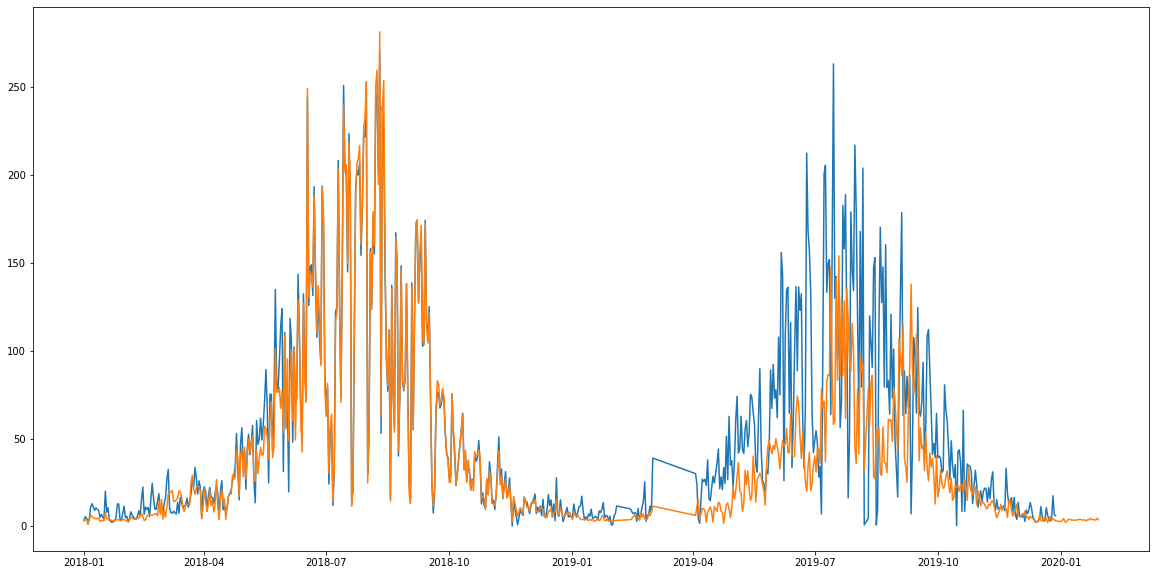

In [26]:
plt.plot(two_yrs["LE (W/m2)"])
plt.plot(two_yrs["30 day forecast"])

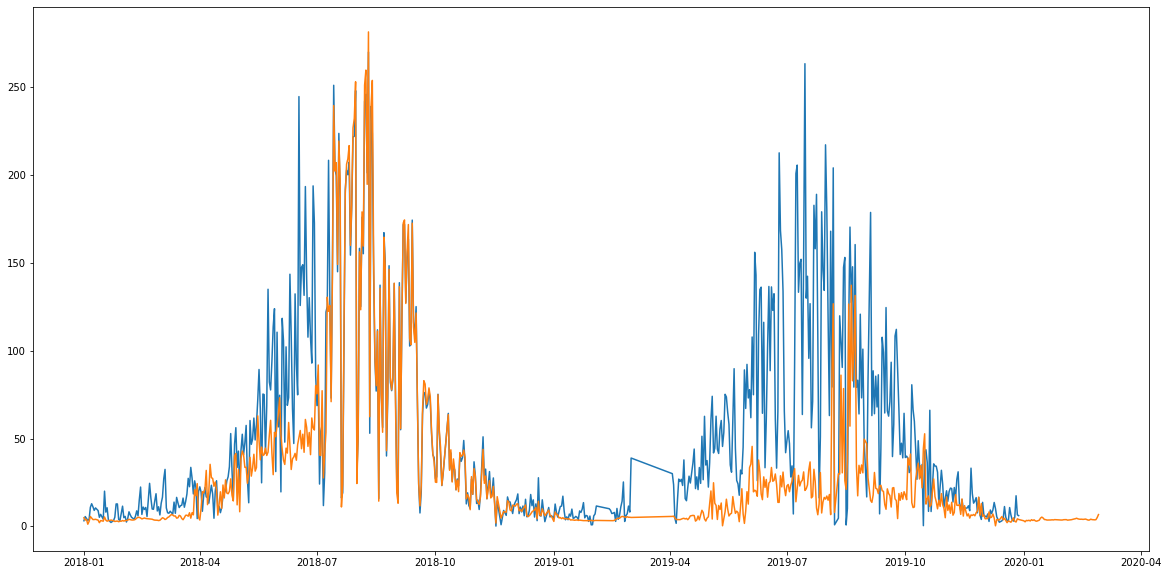

In [27]:
plt.plot(two_yrs["LE (W/m2)"])
plt.plot(two_yrs["60 day forecast"])

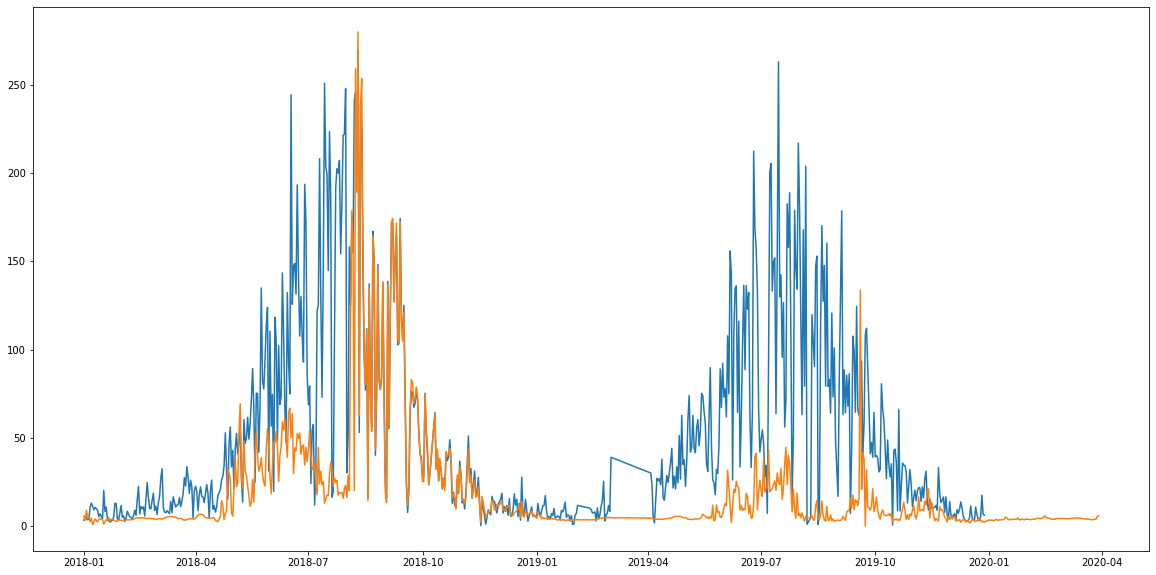

In [28]:
plt.plot(two_yrs["LE (W/m2)"])
plt.plot(two_yrs["90 day forecast"])

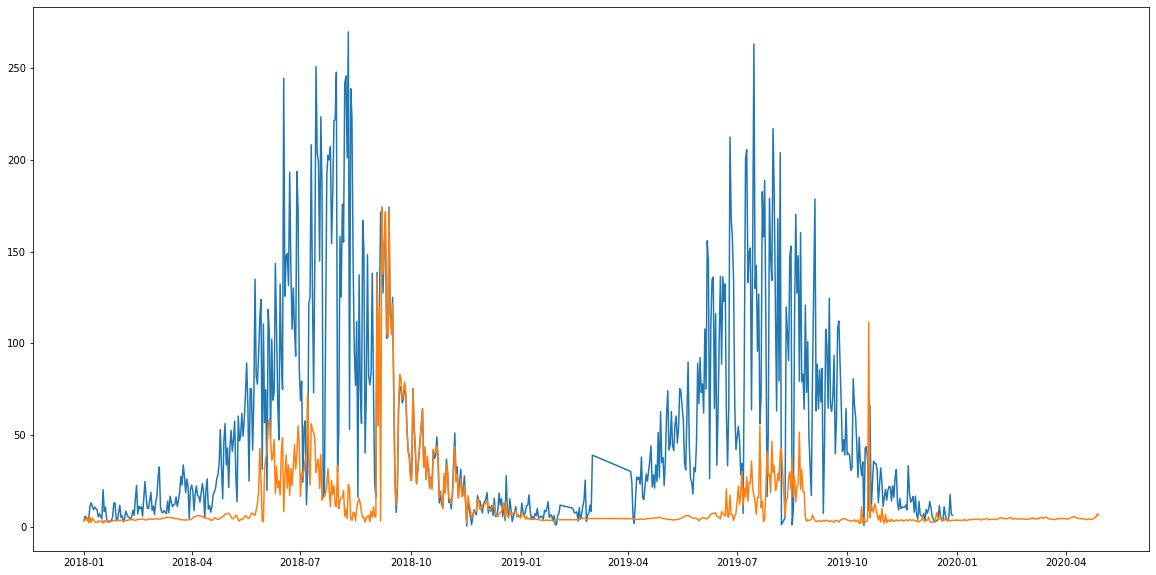

In [29]:
plt.plot(two_yrs["LE (W/m2)"])
plt.plot(two_yrs["120 day forecast"])

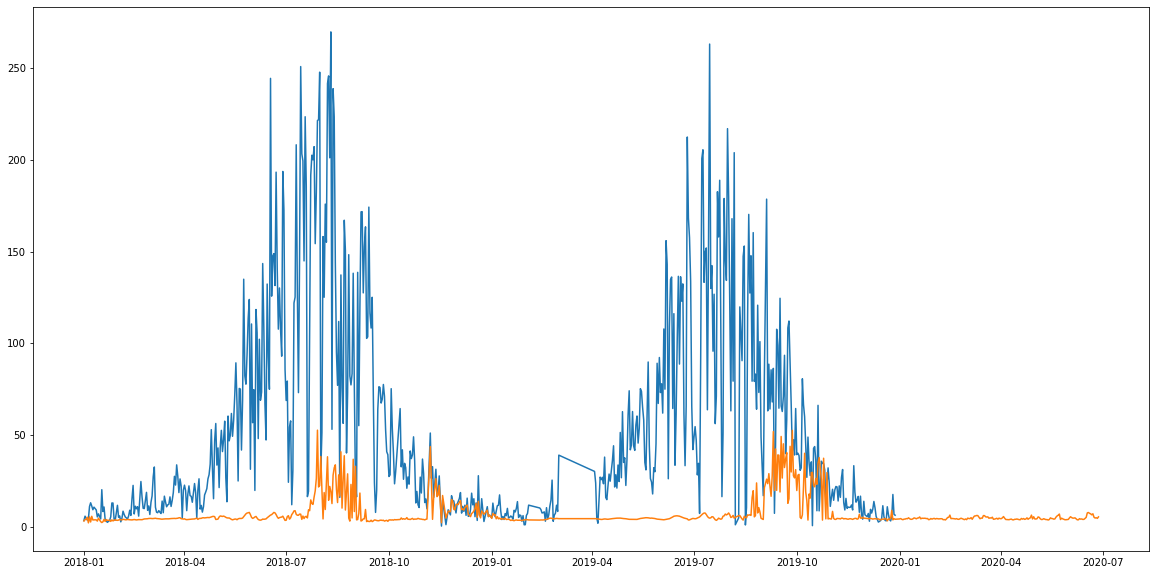

In [30]:
plt.plot(two_yrs["LE (W/m2)"])
plt.plot(two_yrs["180 day forecast"])

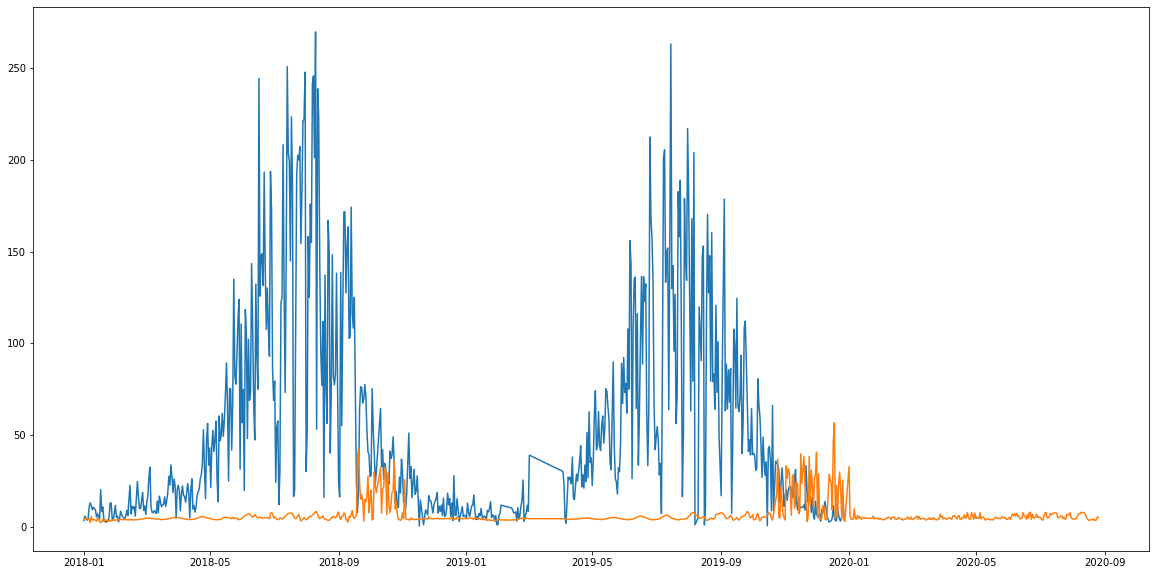

In [31]:
plt.plot(two_yrs["LE (W/m2)"])
plt.plot(two_yrs["240 day forecast"])

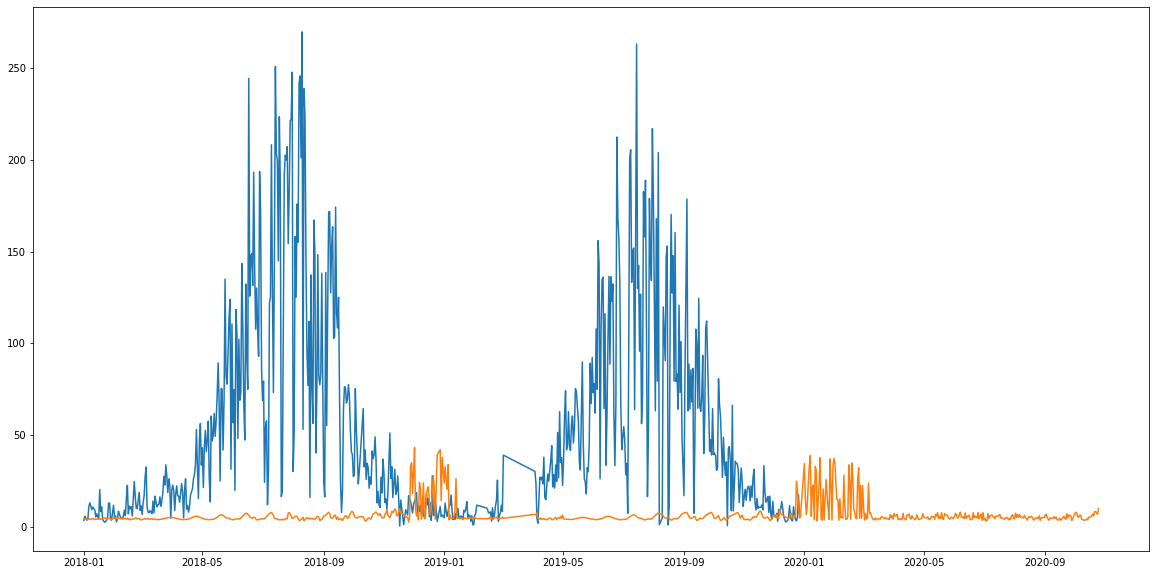

In [32]:
plt.plot(two_yrs["LE (W/m2)"])
plt.plot(two_yrs["300 day forecast"])

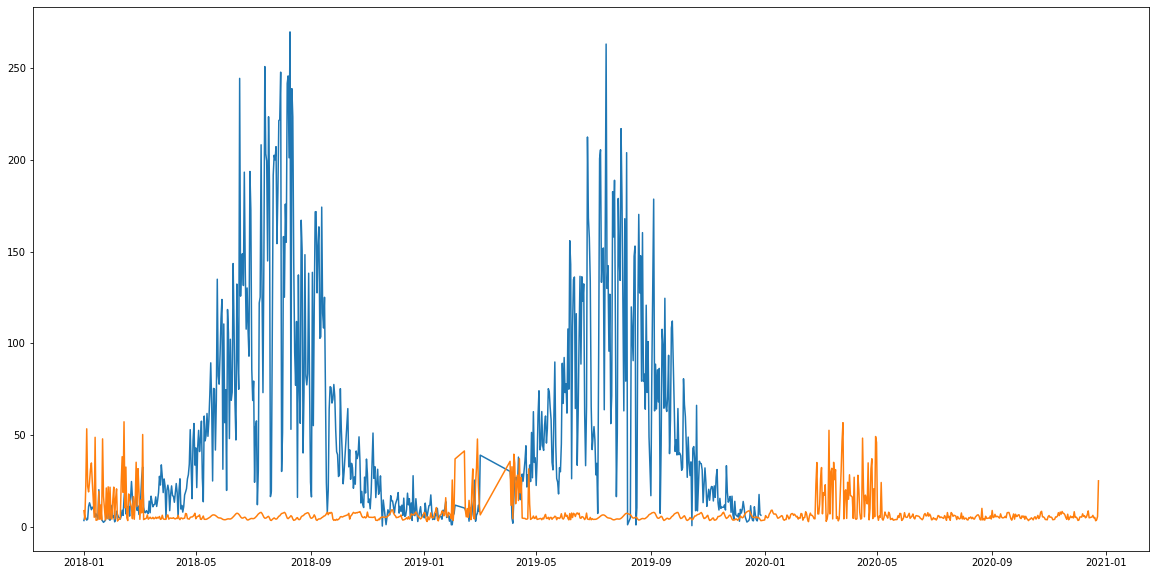

In [33]:
plt.plot(two_yrs["LE (W/m2)"])
plt.plot(two_yrs["360 day forecast"])

## Test year only

In [34]:
if select in (0, 2, 3):
    test = pred["2019":]
else:
    test = pred["2014":]

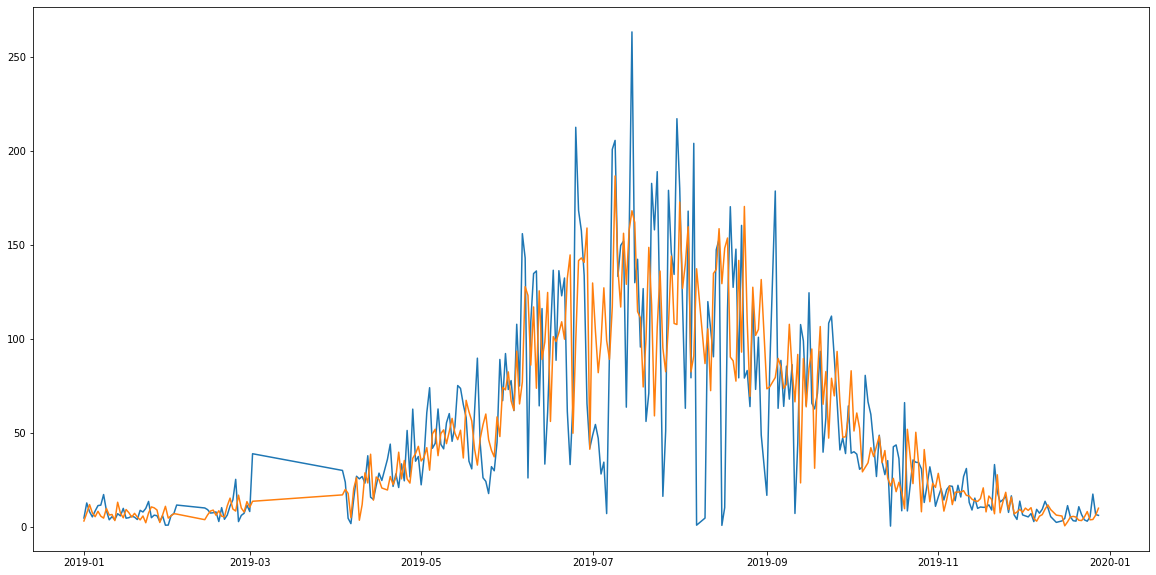

In [35]:
plt.plot(test["LE (W/m2)"])
plt.plot(test["1 day forecast"])

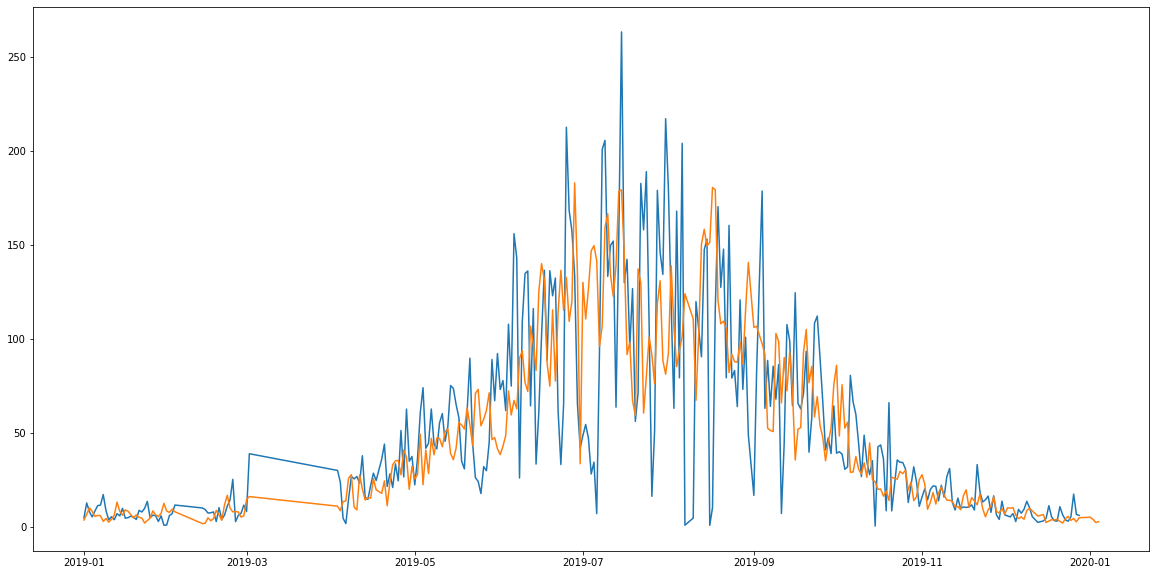

In [36]:
plt.plot(test["LE (W/m2)"])
plt.plot(test["5 day forecast"])

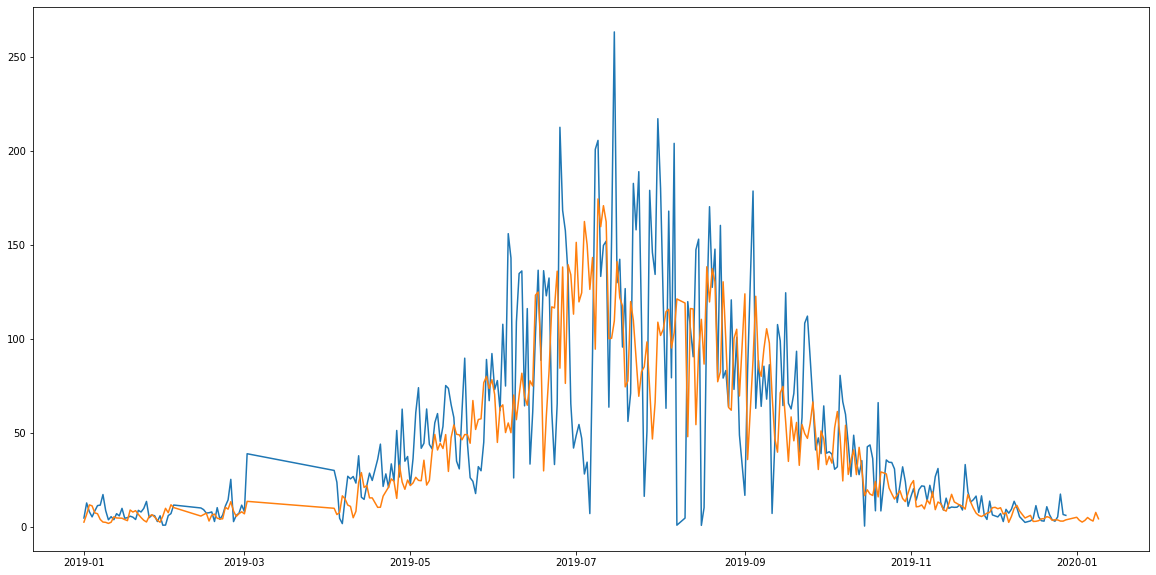

In [37]:
plt.plot(test["LE (W/m2)"])
plt.plot(test["10 day forecast"])

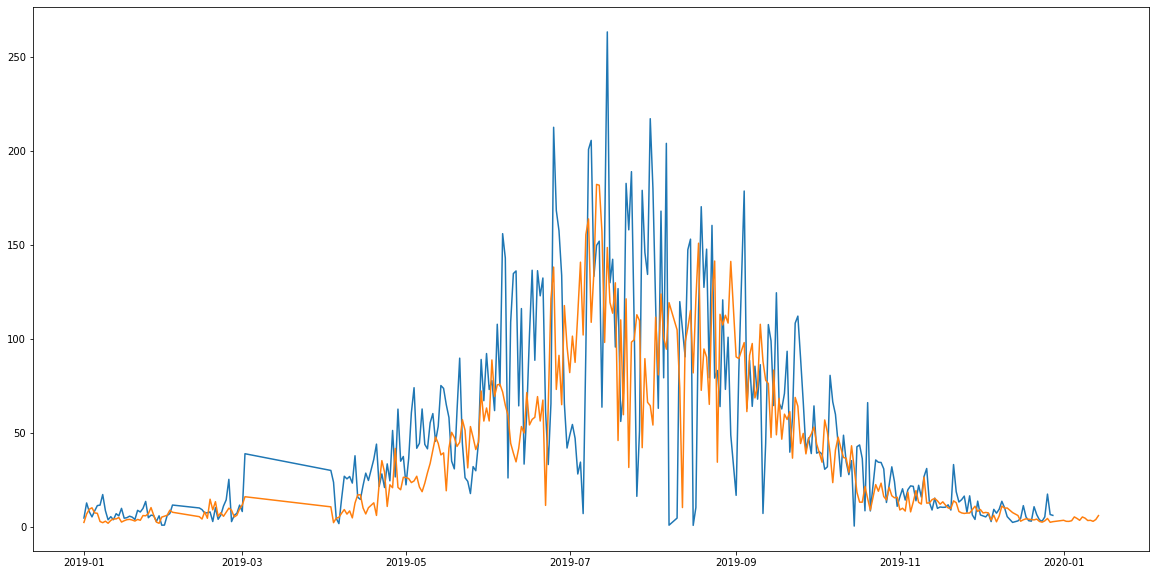

In [38]:
plt.plot(test["LE (W/m2)"])
plt.plot(test["15 day forecast"])

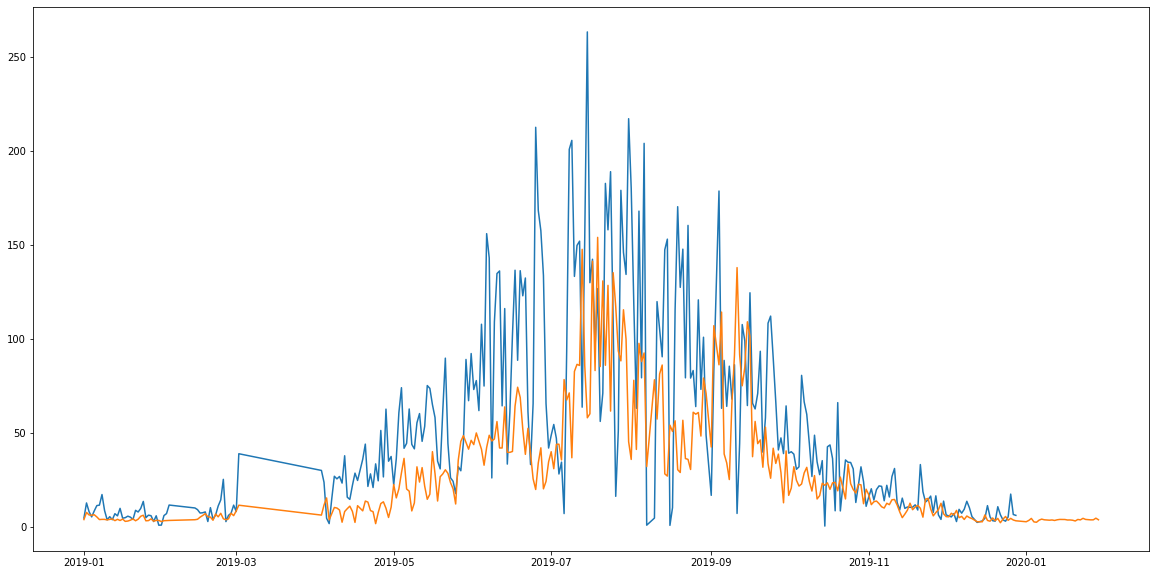

In [39]:
plt.plot(test["LE (W/m2)"])
plt.plot(test["30 day forecast"])

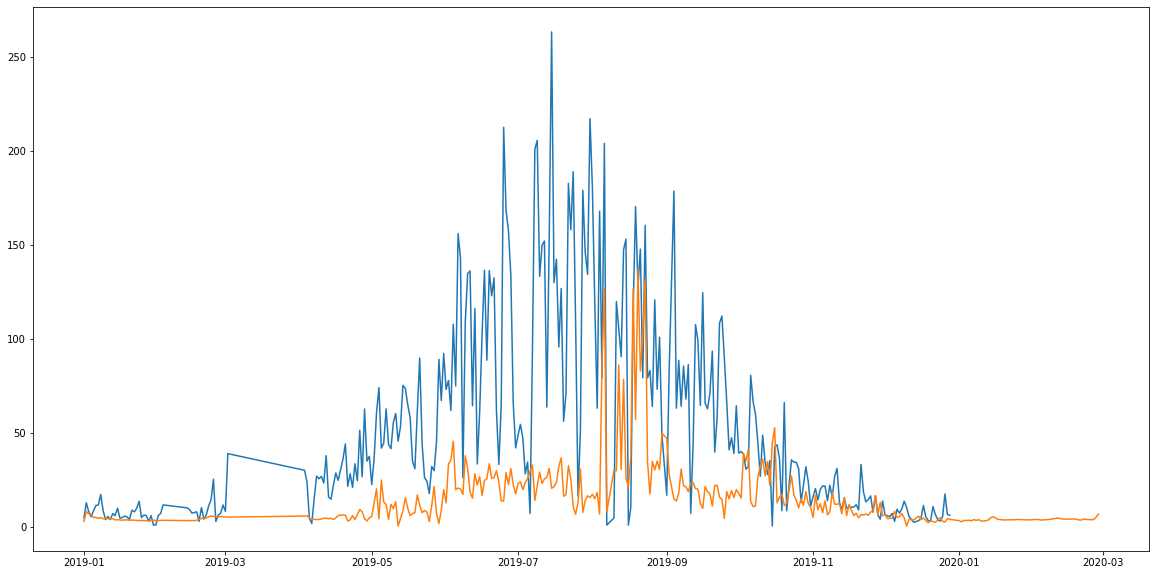

In [40]:
plt.plot(test["LE (W/m2)"])
plt.plot(test["60 day forecast"])

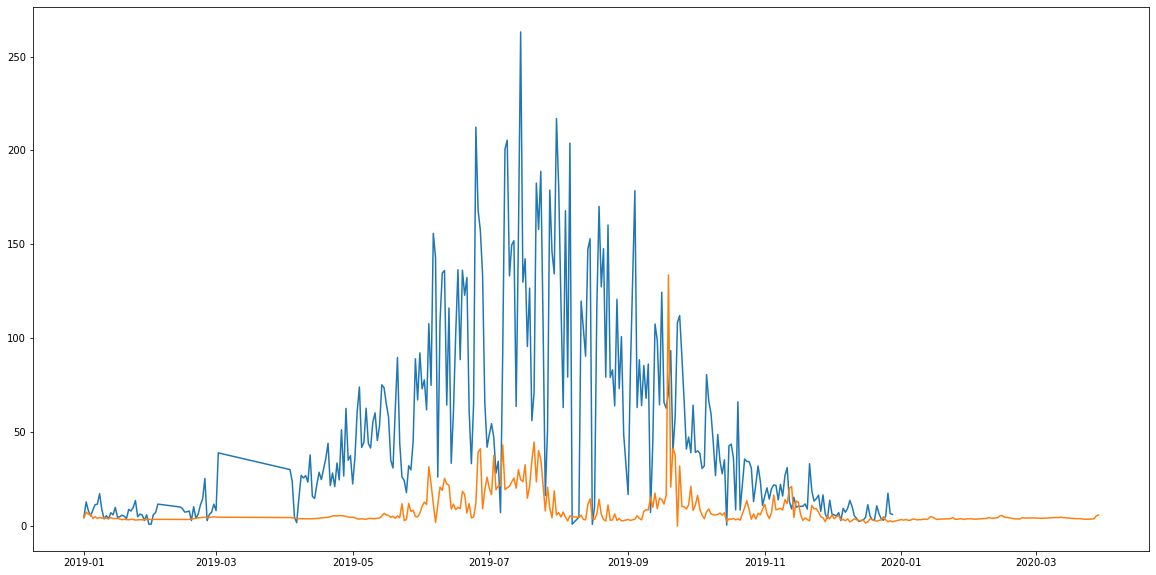

In [41]:
plt.plot(test["LE (W/m2)"])
plt.plot(test["90 day forecast"])

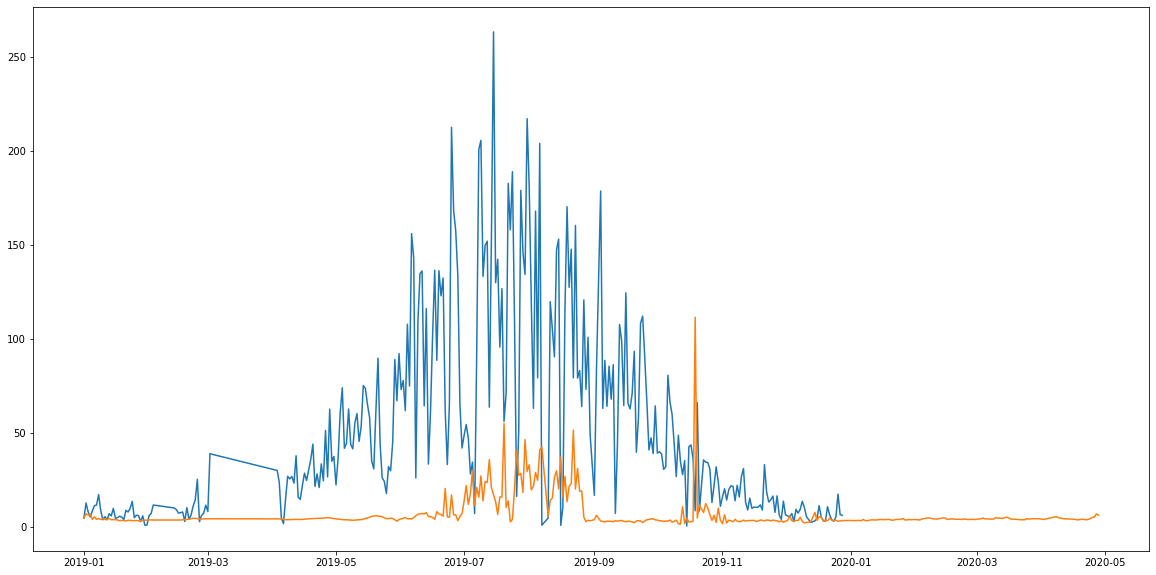

In [42]:
plt.plot(test["LE (W/m2)"])
plt.plot(test["120 day forecast"])

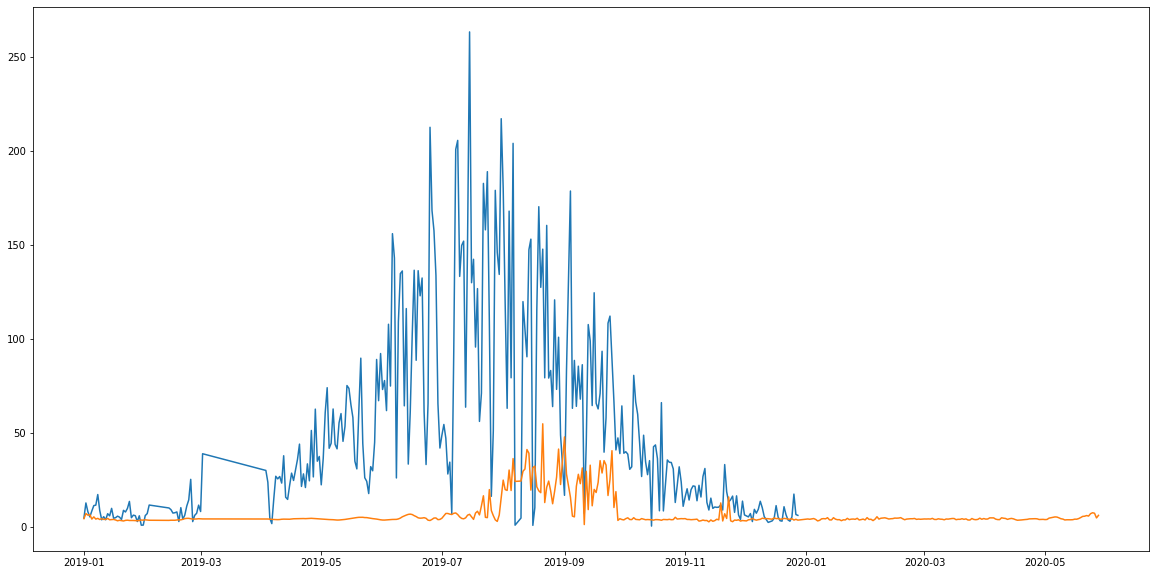

In [43]:
plt.plot(test["LE (W/m2)"])
plt.plot(test["150 day forecast"])

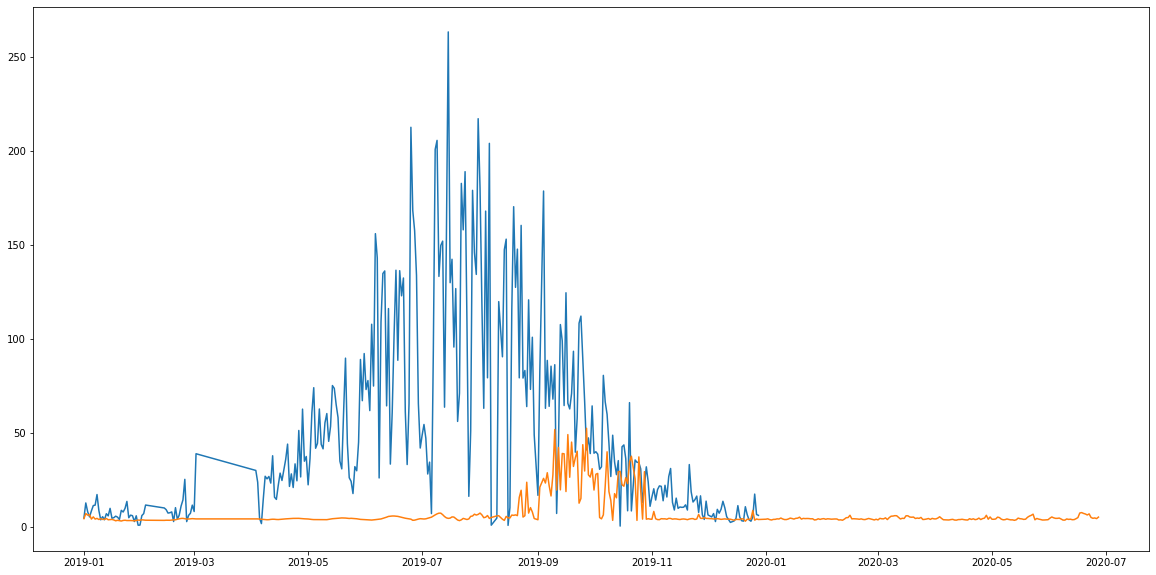

In [44]:
plt.plot(test["LE (W/m2)"])
plt.plot(test["180 day forecast"])

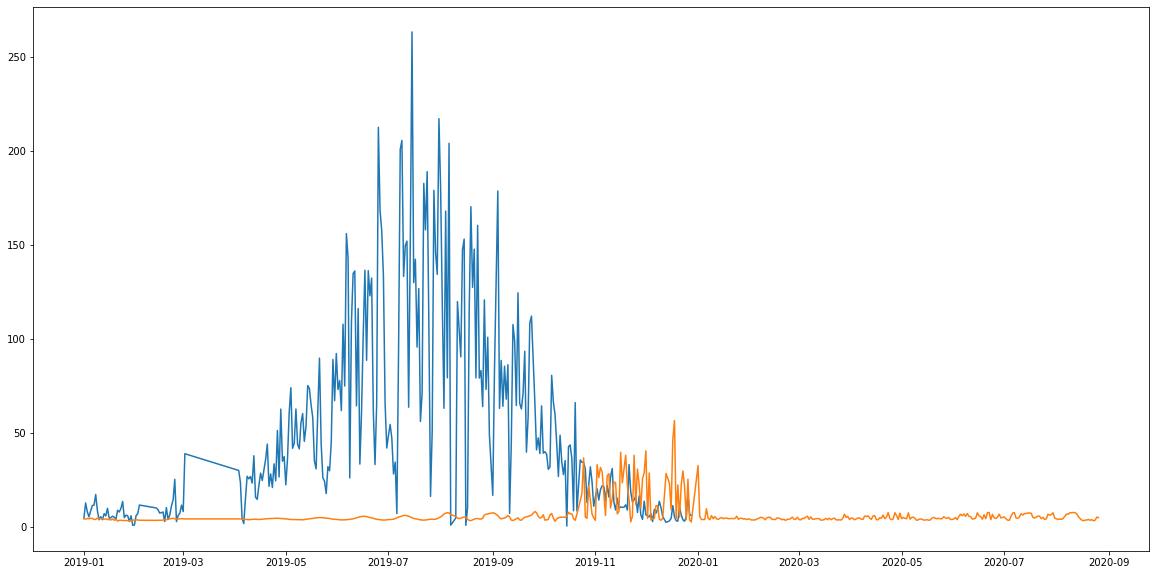

In [45]:
plt.plot(test["LE (W/m2)"])
plt.plot(test["240 day forecast"])

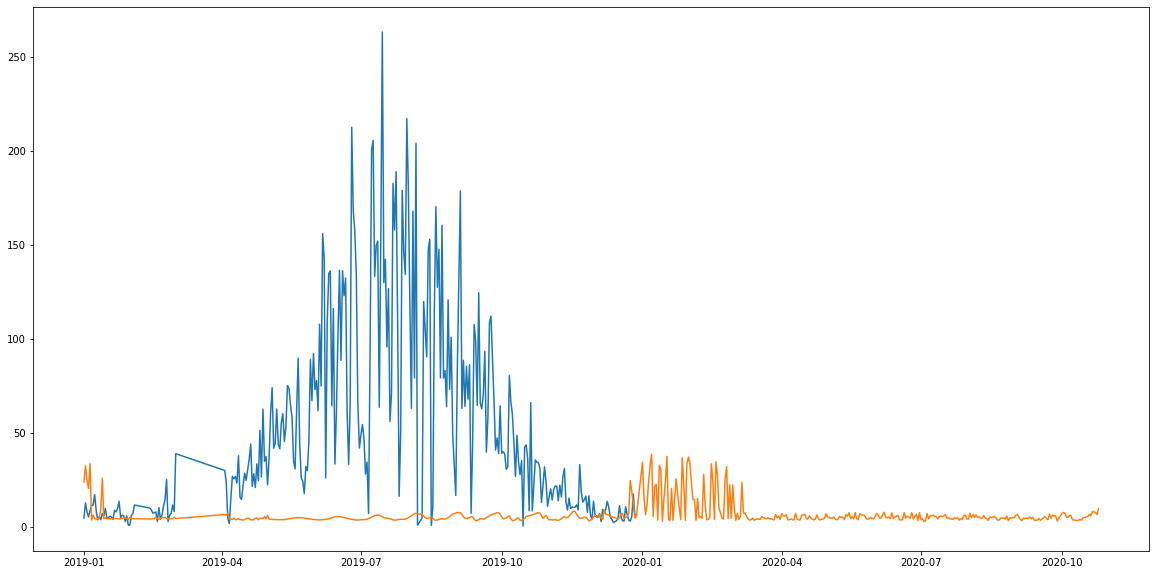

In [46]:
plt.plot(test["LE (W/m2)"])
plt.plot(test["300 day forecast"])

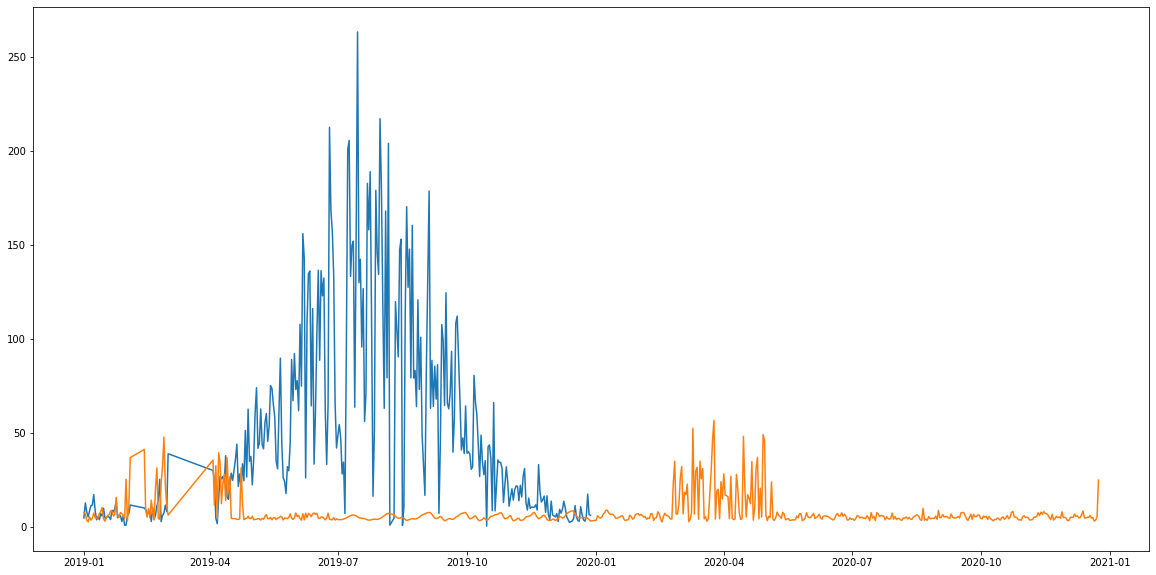

In [47]:
plt.plot(test["LE (W/m2)"])
plt.plot(test["360 day forecast"])

## 1 year forecast from each month of test year

In [48]:
def get_forecast(startdate, num_days, df):
    datelist = pd.date_range(start=startdate, periods=num_days).tolist()
    period = pred[fromday:datelist[-1]]
    single = [period.iloc[i, i] for i in range(num_days)]
    gt = pd.DataFrame(pred["LE (W/m2)"][fromday:datelist[-1]])
    gt["Forecast"] = single
    return gt

In [49]:
if select in (0, 2, 3):
    year = 2019
else:
    year = 2014

In [51]:
fromday = f"{year}-01-01"
forecast = get_forecast(fromday, 100, pred)
plt.plot(forecast)

IndexError: ignored

In [ ]:
fromday = f"{year}-02-01"
forecast = get_forecast(fromday, 365, pred)
plt.plot(forecast)

In [ ]:
fromday = f"{year}-03-01"
forecast = get_forecast(fromday, 365, pred)
plt.plot(forecast)

In [ ]:
fromday = f"{year}-04-01"
forecast = get_forecast(fromday, 365, pred)
plt.plot(forecast)

In [ ]:
fromday = f"{year}-05-01"
forecast = get_forecast(fromday, 365, pred)
plt.plot(forecast)

In [ ]:
fromday = f"{year}-06-01"
forecast = get_forecast(fromday, 365, pred)
plt.plot(forecast)

In [ ]:
fromday = f"{year}-07-01"
forecast = get_forecast(fromday, 365, pred)
plt.plot(forecast)

In [ ]:
fromday = f"{year}-08-01"
forecast = get_forecast(fromday, 365, pred)
plt.plot(forecast)

In [ ]:
fromday = f"{year}-09-01"
forecast = get_forecast(fromday, 365, pred)
plt.plot(forecast)

In [ ]:
fromday = f"{year}-10-01"
forecast = get_forecast(fromday, 365, pred)
plt.plot(forecast)

In [ ]:
fromday = f"{year}-11-01"
forecast = get_forecast(fromday, 365, pred)
plt.plot(forecast)

In [ ]:
fromday = f"{year}-12-01"
forecast = get_forecast(fromday, 365, pred)
plt.plot(forecast)

In [ ]:
fromday = f"{year}-12-30"
forecast = get_forecast(fromday, 365, pred)
plt.plot(forecast)